In [33]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

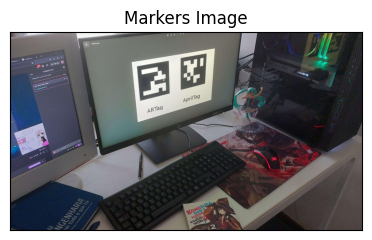

In [34]:
image = cv.imread('template-matching-images/rotate_ar.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert from BGR to RGB
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(image)
plt.title('Markers Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Corner Detection

### Manually

In [35]:
corners = []

def corner_selector(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append((x,y))
        cv.circle(image,(x,y),5,(0,255,0))
        cv.imshow('Markers Image', image)

In [36]:
MAX_CORNERS = 8

cv.imshow('Markers Image', image)

cv.setMouseCallback('Markers Image',corner_selector)

while True:
    key = cv.waitKey(1) & 0xFF
    if key == ord('q') or len(corners) == MAX_CORNERS:
        cv.destroyAllWindows()
        break

In [37]:
#for now we'll assume the user manually inputed the corners correctly.
#TODO just make a clustering function to make two clusters of corners :))

first_image_corners = corners[:4]

second_image_corners = corners[4:]

print("First image corners:", first_image_corners)
print("Second image corners:", second_image_corners)

First image corners: [(1663, 467), (2077, 390), (2088, 813), (1708, 910)]
Second image corners: [(2234, 355), (2571, 296), (2554, 686), (2241, 765)]


### Using OpenCV

In [43]:
#TODO: Add automatic corner detection



AttributeError: module 'cv2.aruco' has no attribute 'Dictionary_get'

## Homography

### Calculate homography matrix

In [39]:
#TODO: Calculate homography matrix

#Let us use cv::findHomography()

src_points = np.array(first_image_corners, dtype=np.float32)
dst_points = np.array([(0,0),(100,0),(100,100),(0,100)],dtype=np.float32)

first_homography , _ = cv.findHomography(src_points, dst_points)

src_points = np.array(second_image_corners, dtype=np.float32)

second_homography , _ = cv.findHomography(src_points,dst_points)

### Transform the markers to a frontal veiw

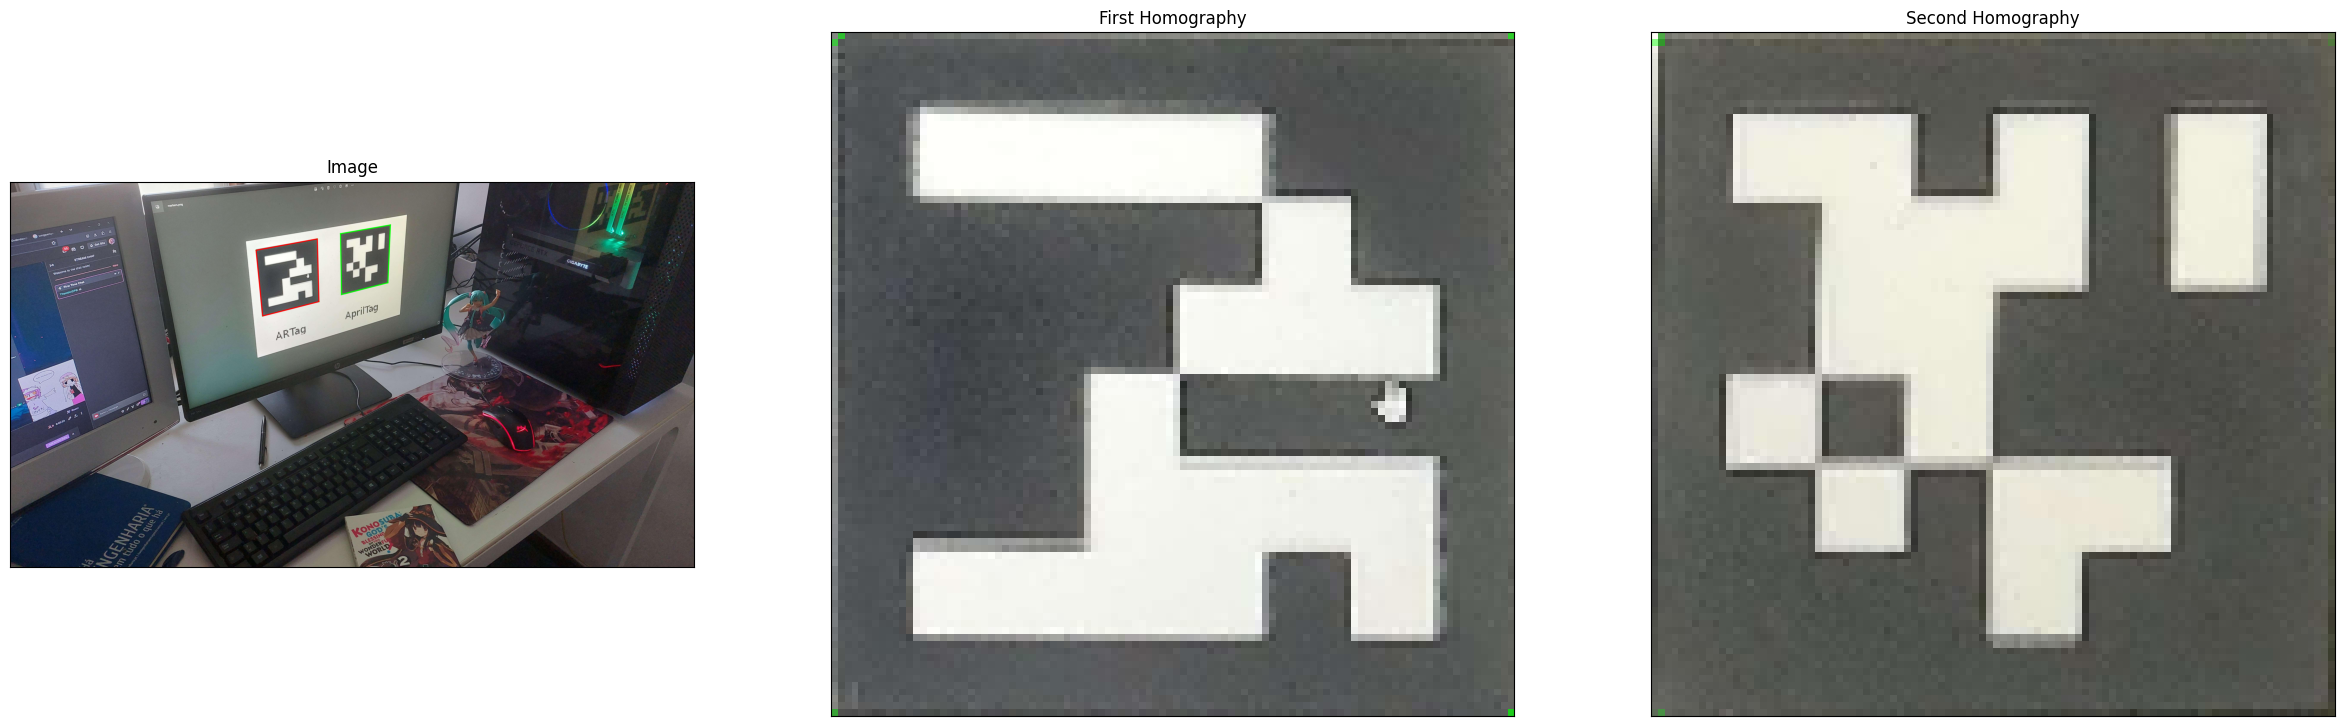

In [40]:
#TODO: Add a function to calculate the homography matrix, using warpPerspective()???

#Let us use cv::warpPerspective() then :)))

first_warp = cv.warpPerspective(image,first_homography,(100,100))

second_warp = cv.warpPerspective(image, second_homography,(100,100))

thickness = 5
line_type = cv.LINE_AA

#??
cv.polylines(image,[np.int32(first_image_corners)], True, (255,0,0),thickness,line_type)
cv.polylines(image,[np.int32(second_image_corners)],True,(0,255,0),thickness, line_type)




plt.figure(figsize=(30,30))
plt.subplot(131),plt.imshow(image)
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(first_warp, cmap = 'gray')
plt.title('First Homography'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(second_warp, cmap = 'gray')
plt.title('Second Homography'), plt.xticks([]), plt.yticks([])
plt.show()